# Nth principal component

### 1. 第一主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10, size=100)

In [3]:
def demean(X):
    # 在行方向求均值，得到每一列的均值
    return X - np.mean(X, axis=0)

X = demean(X)

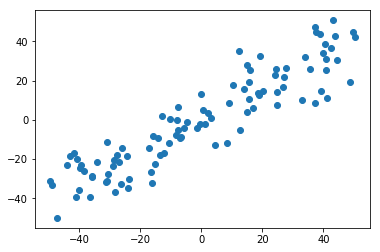

In [4]:
plt.scatter(X[:, 0], X[:, 1])

In [5]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

# 把 w 单位化
def direction(w):
    return w / np.linalg.norm(w)
# 梯度上升法
def first_component(X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    cur_iter = 0
    w = direction(initial_w)
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)  # 注意 1：每次求一个单位方向
        if abs(f(w, X) - f(last_w, X)) < epsilon:
            break
        
        cur_iter += 1
    
    return w

In [6]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)

In [7]:
w

array([0.76519452, 0.64379915])

### 2. 第二主成分

In [8]:
X2 = np.empty(X.shape)
# 去掉第一主成分上的分量
# for i in range(len(X)):
#     X2[i] = X[i] - X[i].dot(w) * w
X2 = X - X.dot(w).reshape(-1, 1) * w

**去掉第一主成分后的数据分布**

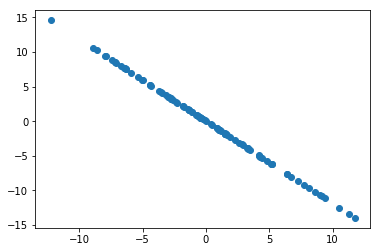

In [9]:
plt.scatter(X2[:, 0], X2[:, 1])

In [10]:
w2 = first_component(X2, initial_w, eta)

In [11]:
w2

array([-0.64379625,  0.76519696])

In [12]:
w.dot(w2)

3.777687873407487e-06

### 3. 第 n 主成分

In [16]:
# 对数据 X 求出其前 n 主成分，即降到 n 维
def first_n_component(n, X, eta=0.01, n_iters = 1e4, epsilon=1e-8):
    X_pca = X
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        # 减去相应的主成分
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
        
    return res

In [17]:
first_n_component(2, X)

[array([0.76519461, 0.64379905]), array([ 0.64380362, -0.76519076])]

### 4. 从高维数据到低维数据的映射

In [18]:
from PCA.PCA import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [19]:
pca.components_

array([[ 0.76519447,  0.64379921],
       [-0.64379674,  0.76519655]])

In [21]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [22]:
X_reduction = pca.transform(X)

In [23]:
X_reduction.shape # 降维后只剩下一个特征

(100, 1)

In [24]:
X_restore = pca.inverse_transform(X_reduction)

In [25]:
X_restore.shape # 升维后 X 恢复到两个特征

(100, 2)

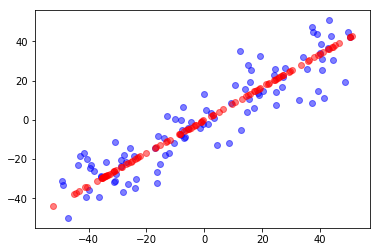

In [26]:
plt.scatter(X[:, 0], X[:, 1], color='b', alpha=0.5)
plt.scatter(X_restore[:, 0], X_restore[:, 1], color='r', alpha=0.5)

### 5. scikit-learn 中的 PCA 简单使用

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
pca.components_

array([[-0.76519459, -0.64379907]])

In [30]:
X_reduction = pca.transform(X)

In [31]:
X_reduction.shape

(100, 1)

In [32]:
X_restore = pca.inverse_transform(X_reduction)

In [33]:
X_restore.shape

(100, 2)

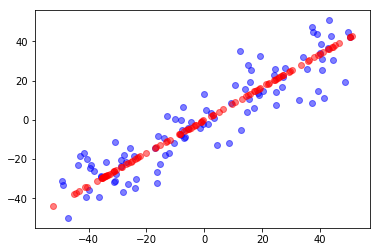

In [34]:
plt.scatter(X[:, 0], X[:, 1], color='b', alpha=0.5)
plt.scatter(X_restore[:, 0], X_restore[:, 1], color='r', alpha=0.5)